In [1]:
import os

import dicom
import numpy as np
from matplotlib import pyplot as plt
import skimage.measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Showing a scan
Before running the below code, download the ELVO data and put the folder in the same directory as this file.

```
some_directory/
    RI Hospital ELVO DATA/...
    Example Scan.ipynb
```

In [ ]:
my_slice = dicom.read_file('RI Hospital ELVO Data/51456445 Head MULTIPHASE_ELVO_CTA_4D Adult/CT 1mm axial brain neck cta/CT000067.dcm')
my_slice

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.66457.30000017042911362072100010392
(0008, 0020) Study Date                          DA: '20170429'
(0008, 0021) Series Date                         DA: '20170429'
(0008, 0022) Acquisition Date                    DA: '20170429'
(0008, 0023) Content Date                        DA: '20170429'
(0008, 002a) Acquisition DateTime                DT: '20170429114722.078000'
(0008, 0030) Study Time                          TM: '113521.959000'
(0008, 0031) Series Time                         TM: '114727.288000'
(0008, 0032) Acquisition Time                    TM: '114722.078000'
(0008, 0033) Content Time                        TM: '114722.078000'
(0008, 0050) Accession Number                

In [3]:
pixel_data = np.frombuffer(my_slice.PixelData, np.int16)
pixel_matrix = pixel_data.reshape(512, 512)

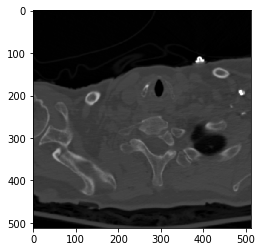

In [ ]:
plt.imshow(pixel_matrix, cmap=plt.cm.gray)

## Plotting a 3D model
Before doing this, make sure to run the script `untitled.py`.

To do this you would "cd" type in the command
`python untitled.py`... TODO

In [7]:
# TODO: plot_3d doesn't show an image in the notebook
def plot_3d(image, threshold=-300):
    """Plots the image as a 3D model.
    """
    # Position the scan upright,
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2, 1, 0)

    verts, faces, _, _ = skimage.measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

In [ ]:
image_51508704 = np.load('patient-51508704.npy')
# plot_3d(image_51508704)